Decompose video into frames

In [67]:
from imutils import contours 
from skimage import measure  
import numpy as np          
import argparse
import imutils
import matplotlib.pyplot as plt
import cv2

vidcap = cv2.VideoCapture('VID_20220519_132403.mp4')

success, image = vidcap.read()
count = 1
while success:
  cv2.imwrite("pattern/image_%d.jpg" % count, image)    
  success, image = vidcap.read()
  count += 1

print("Saved", count, "images")

Saved 346 images


In [68]:
def plot_imshow_in_array(matrices_to_show:list , max_image_in_row:int = 4 , plots_kwargs_list:list = []):
    """
        Plots the image list in an array of row * col , where max(col) = max_image_in_row, and the 
        number of rows is calculated accordingly. 
        @param matrices_to_show a list of matrices to be plotted using plt.imshow
        @param max_image_in_row maximum number of plots in one row
        @param plots_kwargs_list list of dictionaries of parameters of each plot
        
    """    
    ## total number of plots
    plot_count = len(matrices_to_show)
    
    assert len(plots_kwargs_list) == 0 or len(plots_kwargs_list) == len(matrices_to_show) , """ plots_kwargs_list should be either an empty 
                                                                                    list or should have the same number of members
                                                                                    as matrices_to_show """
    
    ## number of rows
    nrow = plot_count // max_image_in_row + (1 if (plot_count % max_image_in_row > 0) else 0)
    
    ## number of columns
    ncol = max_image_in_row if plot_count >= max_image_in_row else plot_count
    
    ## plotting using imshow
    fig , ax = plt.subplots(nrow , ncol , figsize = (12 , 6))
    for i in range(plot_count):
        
        ## select the subplot
        plt.subplot(nrow , ncol , i+1 )
        
        ## format the argument dictionary of the imshow function
        if(len(plots_kwargs_list) == 0):
            config_dict = {}
        else: 
            config_dict = plots_kwargs_list[i]
        
        ## pass the image as well as extra arguments to the imshow function
        plt.imshow(matrices_to_show[i] , **config_dict)
        
    return fig , ax 

In [69]:
pictures = []
print(count)
for i in range(1, count, 1):

    image_address = "./pattern/image_" +str(i) + ".jpg"

    ## read the image
    image = cv2.imread(image_address)

    ## convert BGR to RGB, we won't use this in any of the processes, just to test image loading
    rgb_image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB) 

    ## convert BGR to greyscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ## blur the image with a gussian filter to remove any noise, and also to soften the image
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    thresh = cv2.threshold(blurred, 50 , 255 , cv2.THRESH_BINARY)[1]

    if i == 1:
        max = 0
        (rows, columns) = thresh.shape[:2]

        for row in range(0, rows):
            count = 0
            for column in range(0, columns):
                if thresh[row, column] == 255:
                    count+=1
            if count > max:
                max = count
                best_row = row

    # thresh[best_row,:] = 255

    regions = [i]

    last = -1
    cnt = 0
    for j in range(0, columns):
        if last != -1 and thresh[best_row, j] != last:
            last = thresh[best_row, j]
            regions.append(cnt)
            cnt = 0
        last = thresh[best_row, j]
        cnt += 1

    regions.append(cnt)

    pictures.append(regions)
    # print("Finished picture " + str(i))

# print(pictures)


346


In [70]:
features = [] #count blue, count yellow, width blue, width yellow, standard dev yellow?


for i in range(len(pictures)):
    
    circle = pictures[i][2:len(pictures[i])-1]
    # print(pictures[i])
    # print(circle)
    feature = [pictures[i][0]]
    if len(circle) % 2 ==0:
        feature.append(len(circle)/2)
        feature.append(len(circle)/2) #yellow
    else:
        feature.append((len(circle)-1)/2)
        feature.append((len(circle)+1)/2) #yellow
    
    yellow = 0
    blue = 0
    for j in range(len(circle)):
        if j % 2 == 0:
            yellow += circle[j]
        else:
            blue += circle[j]
    yellow /= feature[2]
    blue /= feature[1]
    feature.append(blue)
    feature.append(yellow)
    # print(feature)
    features.append(feature)


K-means clustering

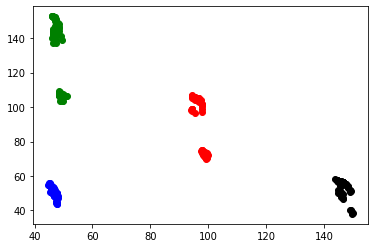

In [77]:
import numpy as np
import matplotlib.pyplot as plt

numpyFeatures = np.array(features)

pattern1 = np.concatenate( (numpyFeatures[1:22] , numpyFeatures[113:142], numpyFeatures[233:262]))
pattern2 = np.concatenate((numpyFeatures[23:52],  numpyFeatures[143:172] , numpyFeatures[263:292]))
pattern3 = np.concatenate((numpyFeatures[53:82] , numpyFeatures[173:202] , numpyFeatures[293:322]))
pattern4 = np.concatenate((numpyFeatures[83:112] , numpyFeatures[203:232] , numpyFeatures[323:345]))

pattern1X = pattern1[:,3]
pattern1Y = pattern1[:,4]

pattern2X = pattern2[:,3]
pattern2Y = pattern2[:,4]

pattern3X = pattern3[:,3]
pattern3Y = pattern3[:,4]

pattern4X = pattern4[:,3]
pattern4Y = pattern4[:,4]

# X= numpyFeatures[:,3]
# Y= numpyFeatures[:,4]


# print(X)
# print(Y)

plt.scatter(pattern1X, pattern1Y, color = "red")
plt.scatter(pattern2X, pattern2Y, color = "green")
plt.scatter(pattern3X, pattern3Y, color = "blue")
plt.scatter(pattern4X, pattern4Y, color = "black")

plt.show()

[[-0.89153754 -0.88220686]
 [-0.84635102  1.33954243]
 [ 0.33943269  0.34127039]
 [ 1.54911434 -0.83306474]]


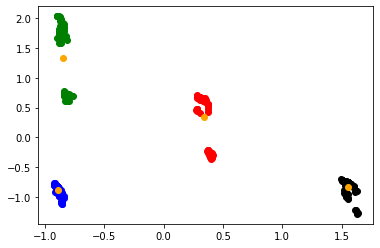

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3]
[(53, 82), (173, 202), (293, 322)]
[(23, 52), (143, 172), (263, 292)]
[(1, 22), (113, 142), (233, 262)]
[(83, 112), (203, 232), (323, 345)]


In [97]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import itertools

kmeansFeatures = numpyFeatures[:,3:5]
# print(scaled_features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeansFeatures)

kmeans = KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300,
random_state=42)

kmeans.fit(scaled_features)

kmeans.cluster_centers_


pattern1 = np.concatenate( (scaled_features[1:22] , scaled_features[113:142], scaled_features[233:262]))
pattern2 = np.concatenate((scaled_features[23:52],  scaled_features[143:172] , scaled_features[263:292]))
pattern3 = np.concatenate((scaled_features[53:82] , scaled_features[173:202] , scaled_features[293:322]))
pattern4 = np.concatenate((scaled_features[83:112] , scaled_features[203:232] , scaled_features[323:345]))

plt.scatter(pattern1[:,0], pattern1[:,1], color = "red")
plt.scatter(pattern2[:,0], pattern2[:,1], color = "green")
plt.scatter(pattern3[:,0], pattern3[:,1], color = "blue")
plt.scatter(pattern4[:,0], pattern4[:,1], color = "black")

print(kmeans.cluster_centers_)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "orange")

plt.show()


print(kmeans.labels_)

indices_1 = []
indices_2 = []
indices_3 = []
indices_4 = []

for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        indices_1.append(i)

    if kmeans.labels_[i] == 1:
        indices_2.append(i)

    if kmeans.labels_[i] == 2:
        indices_3.append(i)

    if kmeans.labels_[i] == 3:
        indices_4.append(i)

def ranges(i):
    for a,b in itertools.groupby(enumerate(i), lambda pair: pair[1] -pair[0]):
        b =list(b)
        yield b[0][1]+1, b[-1][1]+1



print(list(ranges(indices_1)))
print(list(ranges(indices_2)))
print(list(ranges(indices_3)))
print(list(ranges(indices_4)))